In [70]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.layers import Flatten, Conv2D, MaxPooling2D

In [71]:
# 파일 다운로드

!wget https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip

--2022-03-20 01:59:44--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.152.128, 173.194.196.128, 209.85.145.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.152.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip.3’

cats_and_dogs_filte 100%[===================>]  65.43M   169MB/s    in 0.4s    

2022-03-20 01:59:45 (169 MB/s) - ‘cats_and_dogs_filtered.zip.3’ saved [68606236/68606236]



In [72]:
import os
import shutil

if os.path.exists('/content/cats_and_dogs_filtered/'):    # 작업 디렉토리는 cats_and_dogs_filtered
    
    shutil.rmtree('/content/cats_and_dogs_filtered/')
    print('/content/cats_and_dogs_filtered/  is removed !!!')

/content/cats_and_dogs_filtered/  is removed !!!


In [73]:
# 압축파일 풀기

import zipfile

with zipfile.ZipFile('/content/cats_and_dogs_filtered.zip', 'r') as target_file:

    target_file.extractall('/content/cats_and_dogs_filtered/') 

In [74]:
# 데이터 전체 개수 확인

import os
import glob

# 데이터 정답 (label) 개수 및 종류 확인

cats_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/cats')
dogs_train_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/dogs')

cats_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/cats')
dogs_validation_list = os.listdir('/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/dogs')

print('cats train file nums = ', len(cats_train_list))
print('dogs train file nums = ', len(dogs_train_list))
print('cats validation file nums = ', len(cats_validation_list))
print('dogs validation file nums = ', len(cats_validation_list))
print('=================================================')

cats train file nums =  1000
dogs train file nums =  1000
cats validation file nums =  500
dogs validation file nums =  500


train 디렉토리에서 image data 읽어서 x_train, y_train 생성

In [75]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

train_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/train/'

train_label_list = os.listdir(train_base_dir)    # 정답이름

print('train label # => ', len(train_label_list))

start_time = datetime.now()

for train_label_name in train_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if train_label_name == 'cats':
        label_num = 0.0
    elif train_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = train_base_dir + train_label_name

    train_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for train_img_file in train_img_file_list:

        train_img = cv2.imread(train_img_file, cv2.IMREAD_COLOR) 

        train_img = cv2.resize(train_img, dsize=(224,224))    # (224,224) 변환

        train_img = cv2.cvtColor(train_img, cv2.COLOR_BGR2RGB)

        image_list.append(train_img)
        label_list.append(label_num) 

# numpy 변환

x_train = np.array(image_list).astype('float32')
y_train = np.array(label_list).astype('float32')

print('x_train.shape = ', x_train.shape, ', y_train.shape = ', y_train.shape)

end_time = datetime.now()

print('train data generation time => ', end_time-start_time)

train label # =>  2
x_train.shape =  (2000, 224, 224, 3) , y_train.shape =  (2000,)
train data generation time =>  0:00:05.771823


validation 디렉토리로부터 이미지 읽어서 x_val, y_val 생성

In [76]:
import os
import cv2
import glob
import numpy as np
from datetime import datetime

image_list = []
label_list = []

validation_base_dir = '/content/cats_and_dogs_filtered/cats_and_dogs_filtered/validation/'

validation_label_list = os.listdir(validation_base_dir)    # 정답이름

print('validation label # => ', len(validation_label_list))

start_time = datetime.now()

for validation_label_name in validation_label_list:

    # cats => 0.0,  dogs => 1.0 변환
    if validation_label_name == 'cats':
        label_num = 0.0
    elif validation_label_name == 'dogs':
        label_num = 1.0

    # 이미지 파일 읽어오기

    file_path = validation_base_dir + validation_label_name

    validation_img_file_list = glob.glob(file_path+'/*.jpg')

    # 각각의 정답 디렉토리에 있는 이미지 파일, 즉 .jpg 파일 읽어서 리스트에 저장
    
    for validation_img_file in validation_img_file_list:

        validation_img = cv2.imread(validation_img_file, cv2.IMREAD_COLOR) 

        validation_img = cv2.resize(validation_img, dsize=(224,224))    # (224,224) 변환

        validation_img = cv2.cvtColor(validation_img, cv2.COLOR_BGR2RGB)

        image_list.append(validation_img)
        label_list.append(label_num)

# numpy 변환

x_val = np.array(image_list).astype('float32')
y_val = np.array(label_list).astype('float32')

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)

end_time = datetime.now()

print('validation data generation time => ', end_time-start_time)

validation label # =>  2
x_val.shape =  (1000, 224, 224, 3) , y_val.shape =  (1000,)
validation data generation time =>  0:00:02.984258


validation data 로 부터 test data 분리 (분리 비율 5 : 5)

In [77]:
import numpy as np

# validation data random shuffle

s = np.arange(len(x_val))

# index random shuffle

np.random.shuffle(s)

# x_val, y_val 재 생성

x_val = x_val[s]
y_val = y_val[s]

# validation, test data 분리
ratio = 0.5

split_num = int(ratio*len(x_val))

print('split num => ', split_num)

x_test = x_val[0:split_num]
y_test = y_val[0:split_num]

x_val = x_val[split_num:]
y_val = y_val[split_num:]

print('x_val.shape = ', x_val.shape, ', y_val.shape = ', y_val.shape)
print('x_test.shape = ', x_test.shape, ', y_test.shape = ', y_test.shape)

split num =>  500
x_val.shape =  (500, 224, 224, 3) , y_val.shape =  (500,)
x_test.shape =  (500, 224, 224, 3) , y_test.shape =  (500,)


이미지 데이터 정규화

In [78]:
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

## TO-DO

In [79]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNet, ResNet50, InceptionV3, Xception

# MobileNet

In [80]:
mobilenet = MobileNet(weights='imagenet', include_top=False, input_shape=(224,224,3))
mobilenet.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

## Model summary

In [81]:
model = Sequential()

model.add(mobilenet)
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 50176)             0         
                                                                 
 dense_16 (Dense)            (None, 16)                802832    
                                                                 
 dropout_8 (Dropout)         (None, 16)                0         
                                                                 
 dense_17 (Dense)            (None, 2)                 34        
                                                                 
Total params: 4,031,730
Trainable params: 4,009,842
Non-trainable params: 21,888
_______________________________________

In [82]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_MobileNet_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 epochs=10, batch_size=16,          # batch_size 는 시스템 메모리에 맞게 설정
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 27s 193ms/step - loss: 0.4386 - acc: 0.8345 - val_loss: 0.1506 - val_acc: 0.9460
Epoch 2/10
125/125 [==============================] - 23s 185ms/step - loss: 0.1241 - acc: 0.9500 - val_loss: 0.1030 - val_acc: 0.9680
Epoch 3/10
125/125 [==============================] - 23s 184ms/step - loss: 0.0649 - acc: 0.9770 - val_loss: 0.1191 - val_acc: 0.9580
Epoch 4/10
125/125 [==============================] - 23s 184ms/step - loss: 0.0648 - acc: 0.9740 - val_loss: 0.0981 - val_acc: 0.9700
Epoch 5/10
125/125 [==============================] - 23s 184ms/step - loss: 0.0529 - acc: 0.9815 - val_loss: 0.0852 - val_acc: 0.9700
Epoch 6/10
125/125 [==============================] - 23s 184ms/step - loss: 0.0252 - acc: 0.9885 - val_loss: 0.1076 - val_acc: 0.9620
Epoch 7/10
125/125 [==============================] - 23s 184ms/step - loss: 0.0244 - acc: 0.9920 - val_loss: 0.0828 - val_acc: 0.9760
Epoch 8/10
125/125 [==============================] - 2

## Accuracy

In [83]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 2s 99ms/step - loss: 0.0452 - acc: 0.9840


[0.045182544738054276, 0.984000027179718]

## Graph

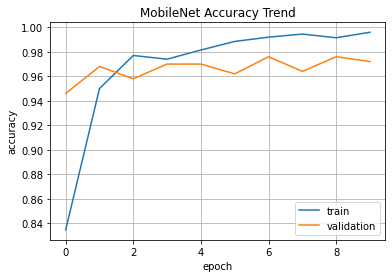

In [84]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('MobileNet Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

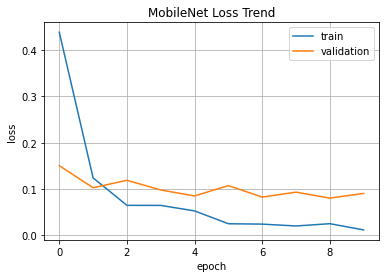

In [85]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('MobileNet Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# ResNet50

In [86]:
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(224,224,3))
resnet.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_10 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_10[0][0]']               
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

## Model summary

In [87]:
model = Sequential()

model.add(resnet)
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_9 (Flatten)         (None, 100352)            0         
                                                                 
 dense_18 (Dense)            (None, 16)                1605648   
                                                                 
 dropout_9 (Dropout)         (None, 16)                0         
                                                                 
 dense_19 (Dense)            (None, 2)                 34        
                                                                 
Total params: 25,193,394
Trainable params: 25,140,274
Non-trainable params: 53,120
_________________________________________________________________


In [88]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_ResNet50_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 epochs=10, batch_size=16,          # batch_size 는 시스템 메모리에 맞게 설정
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 59s 423ms/step - loss: 0.3301 - acc: 0.8665 - val_loss: 1.1807 - val_acc: 0.4940
Epoch 2/10
125/125 [==============================] - 52s 413ms/step - loss: 0.0435 - acc: 0.9865 - val_loss: 2.3860 - val_acc: 0.4940
Epoch 3/10
125/125 [==============================] - 51s 412ms/step - loss: 0.0259 - acc: 0.9900 - val_loss: 3.2015 - val_acc: 0.4940
Epoch 4/10
125/125 [==============================] - 51s 411ms/step - loss: 0.0210 - acc: 0.9940 - val_loss: 3.6907 - val_acc: 0.5020
Epoch 5/10
125/125 [==============================] - 51s 412ms/step - loss: 0.0120 - acc: 0.9960 - val_loss: 1.2625 - val_acc: 0.6480
Epoch 6/10
125/125 [==============================] - 51s 412ms/step - loss: 0.0077 - acc: 0.9980 - val_loss: 0.7551 - val_acc: 0.8400
Epoch 7/10
125/125 [==============================] - 51s 411ms/step - loss: 0.0152 - acc: 0.9960 - val_loss: 0.3246 - val_acc: 0.9160
Epoch 8/10
125/125 [==============================] - 5

## Accuracy

In [89]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 5s 264ms/step - loss: 0.0420 - acc: 0.9900


[0.04198354482650757, 0.9900000095367432]

## Graph

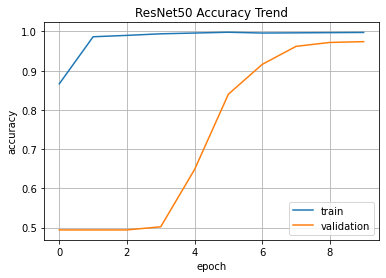

In [90]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('ResNet50 Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

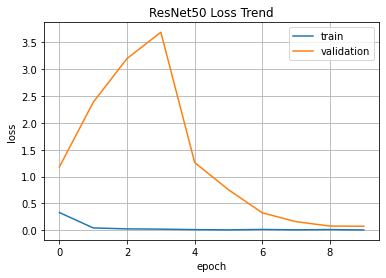

In [91]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('ResNet50 Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# InceptionV3

In [92]:
inception = InceptionV3(weights='imagenet', include_top=False, input_shape=(224,224,3))
inception.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_11 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_192 (Conv2D)            (None, 111, 111, 32  864         ['input_11[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_192 (Batch  (None, 111, 111, 32  96         ['conv2d_192[0][0]']             
 Normalization)                 )                                                      

## Model summary

In [93]:
model = Sequential()

model.add(inception)
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_v3 (Functional)   (None, 5, 5, 2048)        21802784  
                                                                 
 flatten_10 (Flatten)        (None, 51200)             0         
                                                                 
 dense_20 (Dense)            (None, 16)                819216    
                                                                 
 dropout_10 (Dropout)        (None, 16)                0         
                                                                 
 dense_21 (Dense)            (None, 2)                 34        
                                                                 
Total params: 22,622,034
Trainable params: 22,587,602
Non-trainable params: 34,432
_________________________________________________________________


In [94]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_InceptionV3_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 epochs=10, batch_size=16,          # batch_size 는 시스템 메모리에 맞게 설정
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 55s 371ms/step - loss: 0.3133 - acc: 0.8615 - val_loss: 0.0850 - val_acc: 0.9700
Epoch 2/10
125/125 [==============================] - 45s 357ms/step - loss: 0.1217 - acc: 0.9570 - val_loss: 0.1076 - val_acc: 0.9500
Epoch 3/10
125/125 [==============================] - 45s 356ms/step - loss: 0.0684 - acc: 0.9780 - val_loss: 0.1280 - val_acc: 0.9460
Epoch 4/10
125/125 [==============================] - 44s 356ms/step - loss: 0.0442 - acc: 0.9850 - val_loss: 0.1263 - val_acc: 0.9420
Epoch 5/10
125/125 [==============================] - 45s 356ms/step - loss: 0.0272 - acc: 0.9915 - val_loss: 0.1148 - val_acc: 0.9540
Epoch 6/10
125/125 [==============================] - 45s 356ms/step - loss: 0.0154 - acc: 0.9965 - val_loss: 0.1139 - val_acc: 0.9500
Epoch 7/10
125/125 [==============================] - 45s 357ms/step - loss: 0.0232 - acc: 0.9920 - val_loss: 0.1507 - val_acc: 0.9440
Epoch 8/10
125/125 [==============================] - 4

## Accuracy

In [95]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 3s 173ms/step - loss: 0.0416 - acc: 0.9900


[0.04162692278623581, 0.9900000095367432]

## Graph

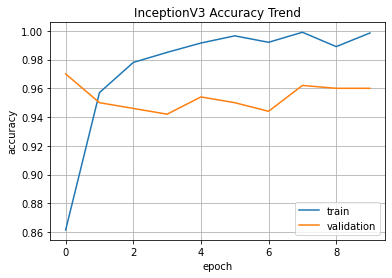

In [96]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('InceptionV3 Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

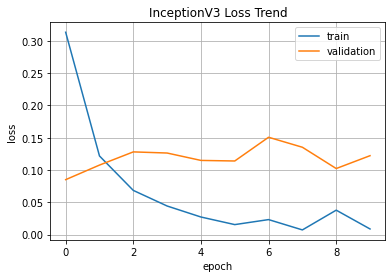

In [97]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('InceptionV3 Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

# Xception

In [98]:
xception = Xception(weights='imagenet', include_top=False, input_shape=(224,224,3))
xception.summary()

Model: "xception"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_12 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_12[0][0]']               
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                          

## Model summary

In [99]:
model = Sequential()

model.add(xception)
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=Adam(2e-5),
              metrics=['acc'])
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 flatten_11 (Flatten)        (None, 100352)            0         
                                                                 
 dense_22 (Dense)            (None, 16)                1605648   
                                                                 
 dropout_11 (Dropout)        (None, 16)                0         
                                                                 
 dense_23 (Dense)            (None, 2)                 34        
                                                                 
Total params: 22,467,162
Trainable params: 22,412,634
Non-trainable params: 54,528
_________________________________________________________________


In [100]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from datetime import datetime

save_file_name = './cats_and_dogs_Xception_Colab.h5'

checkpoint = ModelCheckpoint(save_file_name,             # file명을 지정합니다
                             monitor='val_loss',   # val_loss 값이 개선되었을때 호출됩니다
                             verbose=1,            # 로그를 출력합니다
                             save_best_only=True,  # 가장 best 값만 저장합니다
                             mode='auto'           # auto는 알아서 best를 찾습니다. min/max
                            )

earlystopping = EarlyStopping(monitor='val_loss',  # 모니터 기준 설정 (val loss) 
                              patience=5,         # 5회 Epoch동안 개선되지 않는다면 종료
                             )


start_time = datetime.now()

hist = model.fit(x_train, y_train,
                 epochs=10, batch_size=16,          # batch_size 는 시스템 메모리에 맞게 설정
                 validation_data=(x_val, y_val))

end_time = datetime.now()

print('Elapsed Time => ', end_time-start_time)

Epoch 1/10
125/125 [==============================] - 100s 759ms/step - loss: 0.2520 - acc: 0.9005 - val_loss: 0.0523 - val_acc: 0.9760
Epoch 2/10
125/125 [==============================] - 94s 750ms/step - loss: 0.0639 - acc: 0.9825 - val_loss: 0.0506 - val_acc: 0.9780
Epoch 3/10
125/125 [==============================] - 94s 752ms/step - loss: 0.0422 - acc: 0.9845 - val_loss: 0.0585 - val_acc: 0.9700
Epoch 4/10
125/125 [==============================] - 93s 744ms/step - loss: 0.0257 - acc: 0.9945 - val_loss: 0.0641 - val_acc: 0.9740
Epoch 5/10
125/125 [==============================] - 93s 744ms/step - loss: 0.0202 - acc: 0.9960 - val_loss: 0.0686 - val_acc: 0.9720
Epoch 6/10
125/125 [==============================] - 94s 750ms/step - loss: 0.0158 - acc: 0.9970 - val_loss: 0.0737 - val_acc: 0.9720
Epoch 7/10
125/125 [==============================] - 94s 751ms/step - loss: 0.0112 - acc: 0.9970 - val_loss: 0.0756 - val_acc: 0.9700
Epoch 8/10
125/125 [==============================] - 

## Accuracy

In [101]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 7s 393ms/step - loss: 0.0297 - acc: 0.9900


[0.029653724282979965, 0.9900000095367432]

## Graph

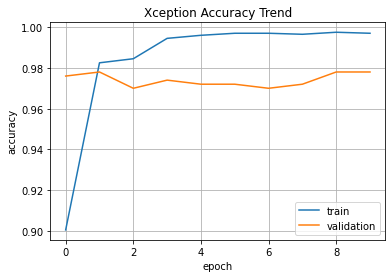

In [102]:
import matplotlib.pyplot as plt

plt.plot(hist.history['acc'], label='train')
plt.plot(hist.history['val_acc'], label='validation')
plt.title('Xception Accuracy Trend')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()

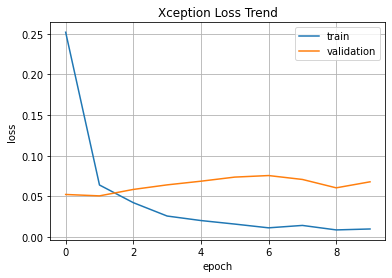

In [103]:
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='validation')
plt.title('Xception Loss Trend')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(loc='best')
plt.grid()
plt.show()